In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Random forests without diabetes

In [3]:
from util.functions import impute_and_train

df_without_diabetes = pd.read_csv('processed/df_without_diabetes.csv')

results = impute_and_train(df_without_diabetes, RandomForestClassifier)

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5


/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 1/5


/Users/luisastue/miniconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5


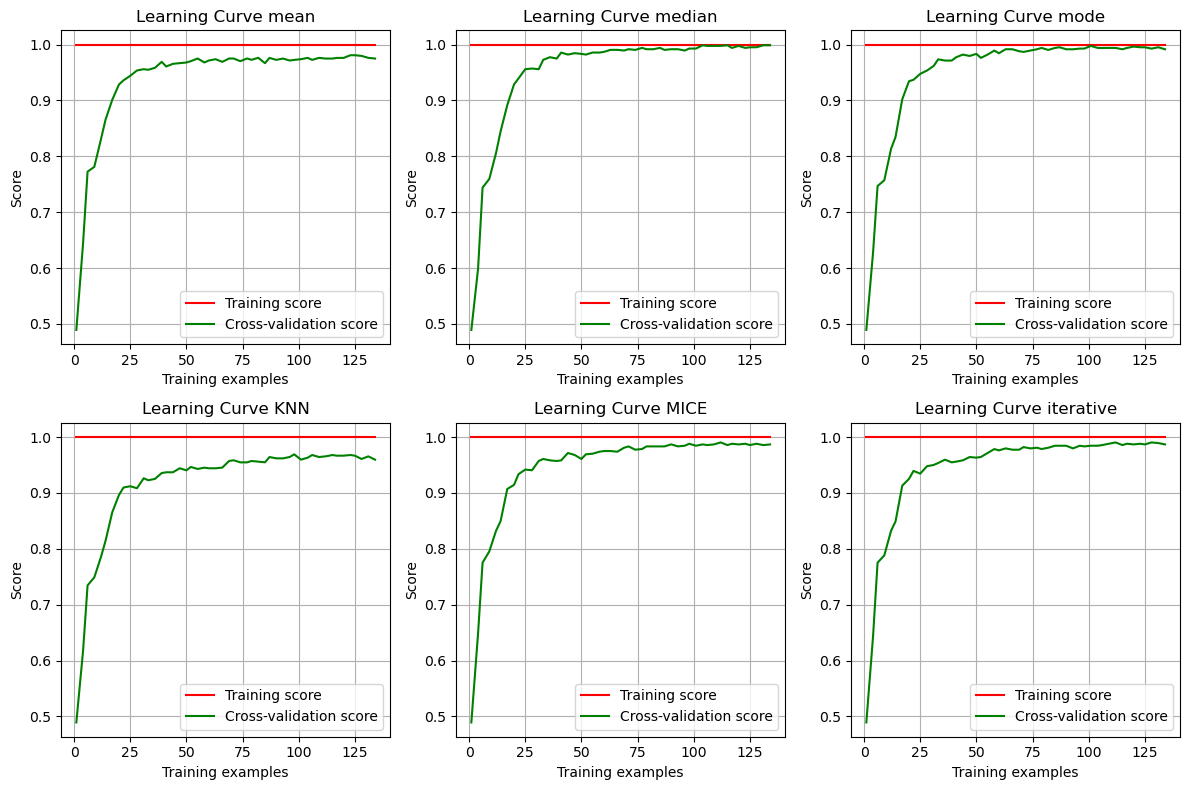

In [4]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

#### Mean feature importances across all folds

In [5]:
df_without_diabetes = pd.read_csv('processed/df_without_diabetes.csv')

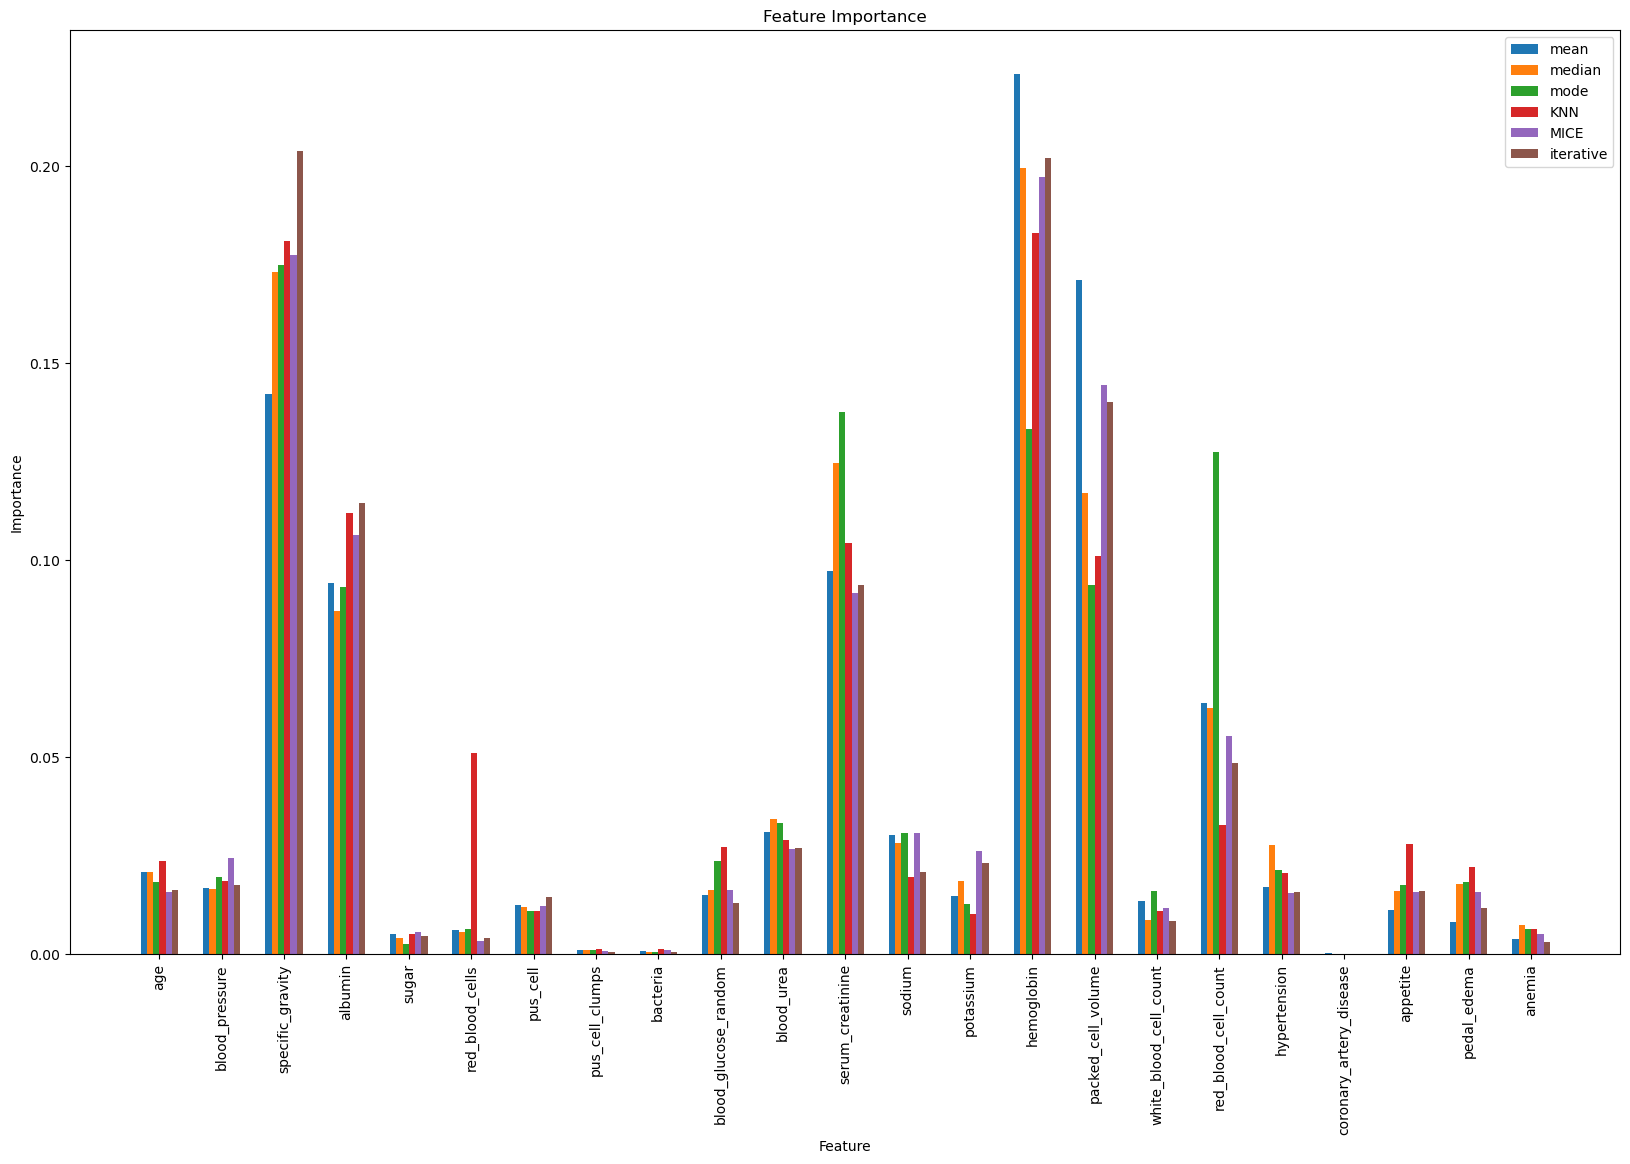

In [6]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np

from util.functions import plot_feature_importances

feature_importances = {}
feature_importances_df = pd.DataFrame(columns=df_without_diabetes.drop(columns=['class']).columns, index=pd.MultiIndex.from_product([results['models'].keys(), range(5)], names=['imputation', 'iteration']))

for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        normalized = model.feature_importances_ / np.sum(model.feature_importances_)
        fi.append(normalized)
        feature_importances_df.loc[(name, i)] = normalized
    
    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_without_diabetes.drop(columns=['class']).columns, columns=['Importance'])

feature_importances_df.to_csv('results/feature_importances_random_forests_without_diabetes.csv', index=True)
plot_feature_importances(feature_importances)